In [2]:
from agents.td3_agent import TD3Agent
import gymnasium as gym
import torchr
from matplotlib import pyplot as plt
import numpy as np

/Users/felix/opt/anaconda3/envs/Gym-RL/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
env = gym.make('LunarLanderContinuous-v2')
input_dim = env.observation_space.shape[0]
n_actions = env.action_space.shape[0]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [4]:
agent = TD3Agent(lr_critic=3e-4,
            lr_actor=3e-4,
            gamma=0.99,
            input_dim=input_dim,
            tau=0.005,
            n_actions=n_actions,
            max_buffer_size=50_000,
            batch_size=256,
            update_actor_interval=2,
            explore_n_times=1_000,
            noise=0.1,
            device=device)

In [5]:
agent.load_agent('models/lunarlander/', 1000)

Loading agent from models/lunarlander/00001000/ ...


In [6]:
# visualize the agent play
env = gym.make('LunarLanderContinuous-v2', render_mode='human')
obs, _ = env.reset()
env.render()

In [7]:
for i in range(3):
    done = False
    obs, _ = env.reset()
    eps_steps = 0
    while not done:
        action = agent.remote_act(obs)
        obs, reward, done, _, info = env.step(action)
        env.render()
        eps_steps += 1
        if done or eps_steps > 500:
            break
env.close()

In [28]:
env.close()

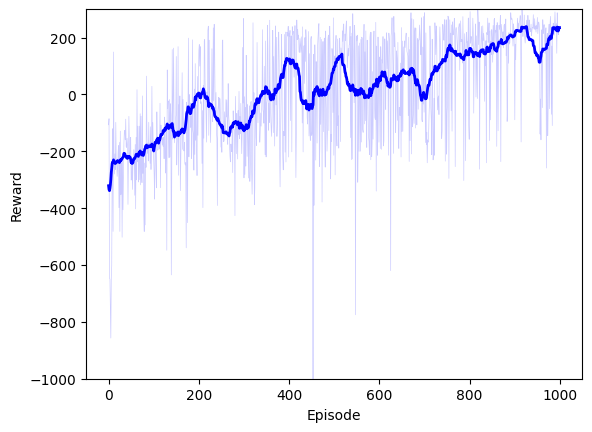

In [10]:
# visualize the reward of the agent
reward = np.load('results_csv/td3/reward_history_lunarlander.npy')
plt.plot(reward, alpha=0.2, color='blue', linewidth=0.5)
# smooth the reward
smoothed_reward = []
for i in range(0, len(reward), 1):
    smoothed_reward.append(np.mean(reward[i:i+30]))
plt.plot(smoothed_reward, color='blue', linewidth=2.0)
plt.xlabel('Episode')
plt.ylabel('Reward')
# set y limits
plt.ylim(-1000, 300)

plt.show()